<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/18_Introduction_Sports_Analytics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

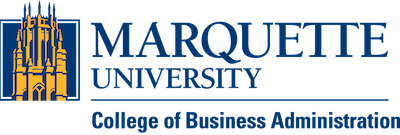



#BUAN4060: Unstructured Data Analytics

##18 Sports Analytics 1: an Introduction

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Introduction to Sports Analytics using R by Ryan Elmore | Andrew Urbaczewski` [GitHub Page](https://github.com/rtelmore)

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb

## 1. The packages & libraries for sports analytics

In [ ]:
install.packages("remotes")
install.packages("ISAR")
install.packages("Lahman")
install.packages("dplyr")
install.packages("ggplot2")

library(remotes) # used to install R packages from github repositories
library(ISAR) # the authors' package to accompany this textbook
library(Lahman) # a lot of baseball data
library(dplyr) # tidyverse package for manipulating data
library(ggplot2) # tidyverse package for data visualization

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘remotes’


The following objects are masked from ‘package:devtools’:

    dev_package_deps, install_bioc, install_bitbucket, install_cran,
    install_deps, install_dev, install_git, install_github,
    install_gitlab, install_local, install_svn, install_url,
    install_version, update_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
install.packages("devtools")
library(devtools)
install_github("rtelmore/ballr")

library(ballr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ballr' from a github remote, the SHA1 (7159dc16) has not changed since last install.
  Use `force = TRUE` to force installation



##2. Exploratory Data Analysis in R

The Lahman package provides a set of tables (as data.frames). The tables come from the Lahman Baseball Database for baseball statistics available at http://seanlahman.com/download-baseball-database/

Once the package is installed, load the package into your current R session using the library() function

In the following code chunk, notice the use of the str() function on Batting immediately after loading the Lahman package. The str() function is used to display the structure of objects in R

In [ ]:
data(battingLabels)

In [ ]:
head(battingLabels)

,variable,label
,<chr>,<chr>
1,playerID,Player ID code
2,yearID,Year
3,stint,Player's stint
4,teamID,Team
5,lgID,League
6,G,Games


In [ ]:
str(battingLabels)

'data.frame':	22 obs. of  2 variables:
 $ variable: chr  "playerID" "yearID" "stint" "teamID" ...
 $ label   : chr  "Player ID code" "Year" "Player's stint" "Team" ...


In [ ]:
rox_batting <- subset(Batting, teamID == "COL" & yearID == 2022)

Given the importance of manipulating data within data frames, we return to the idea of indexing

Suppose we want to select the AB (at bats) column for baseball players, which is the seventh column of Batting

There are a number of ways that you can do this in base R—for example, Batting$AB or Batting[, "AB"], or Batting[, 7]. The numeric indexing applies to both rows and columns

For example, if we want the first five observations from the second and fourth columns of Batting, we can access this information by issuing Batting[1:5, c(2, 4)]. Recall that 1:5 and c(2, 4) are just vectors of length five and two, respectively

For two generic vectors, v1 and v2, we can get the v1 rows and v2 columns from Batting by Batting[v1, v2]. You can define indexing vectors in quite a few unique ways in order to extract data from a data frame

We will examine the data for the Colorado Rockies in 2022. The last line in the previous code chunk creates a new data frame using the subset() function

The function is read as “Create a subset of the Batting data frame consisting of data for only the Colorado Rockies (teamID == "COL") for the year 2022 (yearID == 2022)”

 You may want to know the dimensions of your data frame (or matrix) or the length of an arbitrary vector

 The dim() function returns the number of rows and then columns, while length() returns the number of columns for a single row or the length of a vector in the data frame

In [ ]:
dim(rox_batting)

[1] 43 22

In [ ]:
length(rox_batting)

[1] 22

In [ ]:
mean(rox_batting$HR)

[1] 3.465116

In [ ]:
median(rox_batting$HR)

[1] 0

In [ ]:
sd(rox_batting$HR)

[1] 6.525951

### Plotting Data Exploration

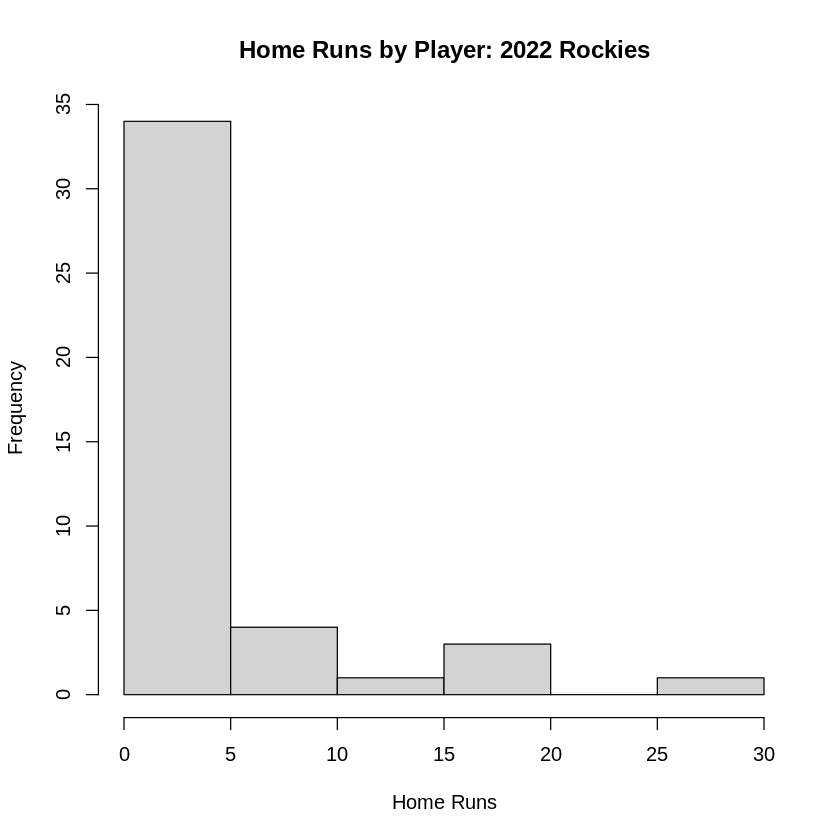

In [ ]:
hist(rox_batting$HR,
  main = "Home Runs by Player: 2022 Rockies",
  xlab = "Home Runs",
  ylab = "Frequency")

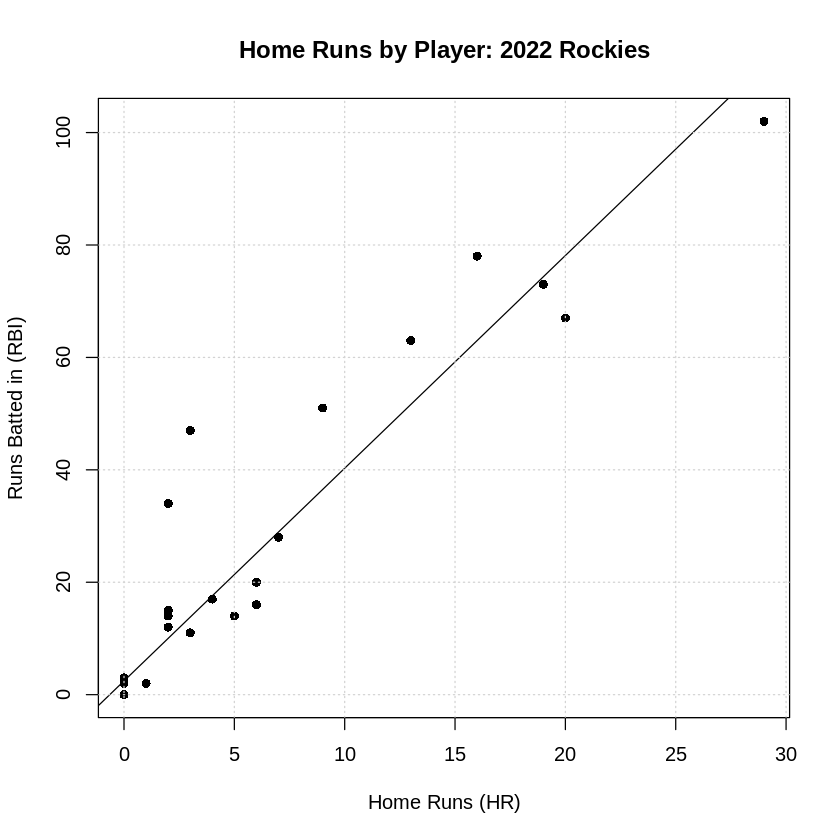

In [ ]:
plot(x = rox_batting$HR,
     y = rox_batting$RBI,
     main = "Home Runs by Player: 2022 Rockies",
     xlab = "Home Runs (HR)",
     ylab = "Runs Batted in (RBI)",
     pch = 16)

rox_regression <- lm(RBI ~ HR, data = rox_batting)
abline(rox_regression, col = "black")
grid()

##3. Data Manipulation

Let's say after we have created df, we need to filter it by teamID

Since we have multiple values for teamID that we want to include in our filtered results, we use the filter() function and tell it to only include teamID that was %in% the vector that followed

In this case, only return Colorado (COL) and Miami (MIA), but since the Miami Marlins were called the Florida Marlins when they first began play in 1993, we need to include Florida (FLO) as well or we will only return more recent results for that franchise

In [ ]:
df <- tibble(Batting)
str(df)

tibble [113,799 × 22] (S3: tbl_df/tbl/data.frame)
 $ playerID: chr [1:113799] "aardsda01" "aardsda01" "aardsda01" "aardsda01" ...
 $ yearID  : int [1:113799] 2004 2006 2007 2008 2009 2010 2012 2013 2015 1954 ...
 $ stint   : int [1:113799] 1 1 1 1 1 1 1 1 1 1 ...
 $ teamID  : Factor w/ 149 levels "ALT","ANA","ARI",..: 117 35 33 16 116 116 93 94 4 80 ...
 $ lgID    : Factor w/ 7 levels "AA","AL","FL",..: 5 5 2 2 2 2 2 5 5 5 ...
 $ G       : int [1:113799] 11 45 25 47 73 53 1 43 33 122 ...
 $ AB      : int [1:113799] 0 2 0 1 0 0 0 0 1 468 ...
 $ R       : int [1:113799] 0 0 0 0 0 0 0 0 0 58 ...
 $ H       : int [1:113799] 0 0 0 0 0 0 0 0 0 131 ...
 $ X2B     : int [1:113799] 0 0 0 0 0 0 0 0 0 27 ...
 $ X3B     : int [1:113799] 0 0 0 0 0 0 0 0 0 6 ...
 $ HR      : int [1:113799] 0 0 0 0 0 0 0 0 0 13 ...
 $ RBI     : int [1:113799] 0 0 0 0 0 0 0 0 0 69 ...
 $ SB      : int [1:113799] 0 0 0 0 0 0 0 0 0 2 ...
 $ CS      : int [1:113799] 0 0 0 0 0 0 0 0 0 2 ...
 $ BB      : int [1:113799] 0 0

In [ ]:
df<-tibble(Batting)|> ## Assign Batting to df as a tibble
    filter(teamID%in%c("COL","MIA","FLO"))|>
    mutate(teamID = as.character(teamID), # Change teamID to a string
    teamID = ifelse(teamID == "FLO", "MIA", teamID)) |> # FLO to MIA
    group_by(teamID, yearID) |> ## Group by team and year
    summarize(team_hr = sum(HR)) ## sum total HR
head(df)

`summarise()` has grouped output by 'teamID'. You can override using the
`.groups` argument.


teamID,yearID,team_hr
<chr>,<int>,<int>
COL,1993,142
COL,1994,125
COL,1995,200
COL,1996,221
COL,1997,239
COL,1998,183


## |> Operator vs. %>% Operator

|> is the native pipe operator introduced in R version 4.1.0. It serves as a way to write cleaner, more readable code by passing the result of one expression as the first argument to the next function

It is similar to the %>% pipe from the magrittr or dplyr package but is part of the base R language

### Without pipe: `log(sqrt(16))`

### Using |> pipe: `16 |> sqrt() |> log()`

### Using |> and an anonymous function: `mtcars |> (\(x) lm(mpg ~ wt, data = x))()`

### Using %>%: `mtcars %>% lm(mpg ~ wt, data = .)`



## 4. Joining Datasets



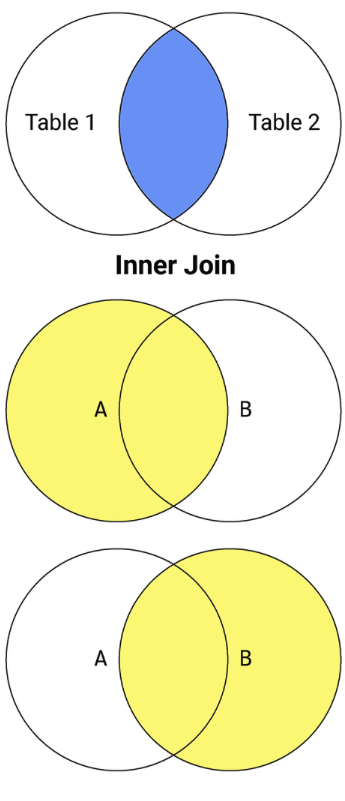

In [ ]:
names(AllstarFull)

[1] "playerID"    "yearID"      "gameNum"     "gameID"      "teamID"     
[6] "lgID"        "GP"          "startingPos"

In [ ]:
mlb_all_stars_2022 <- AllstarFull |>
  filter(yearID == 2022) |>
  left_join(People, by = "playerID") |>
  select(nameFirst, nameLast, startingPos, teamID, lgID, bats, throws)
head(mlb_all_stars_2022)

,nameFirst,nameLast,startingPos,teamID,lgID,bats,throws
,<chr>,<chr>,<int>,<fct>,<fct>,<fct>,<fct>
1,Shane,McClanahan,1,TBA,AL,L,L
2,Alejandro,Kirk,2,TOR,AL,R,R
3,Vladimir,Guerrero,3,TOR,AL,R,R
4,Andres,Gimenez,4,CLE,AL,L,R
5,Rafael,Devers,5,BOS,AL,L,R
6,Tim,Anderson,6,CHA,AL,R,R


### Plotting using the `ggplot()`

ggplot() relies on layers in constructing figures. You first define a plot object by setting up the data to be plotted

Next, you can systematically apply layers to the object in order to display the data

For example, you can apply a layer of points or lines using geom_point() or geom_line() if you are interested in a scatterplot with lines connecting the points

Finally, the grammar allows for the easy customization of colors, groups, and so on by specifying different aesthetics

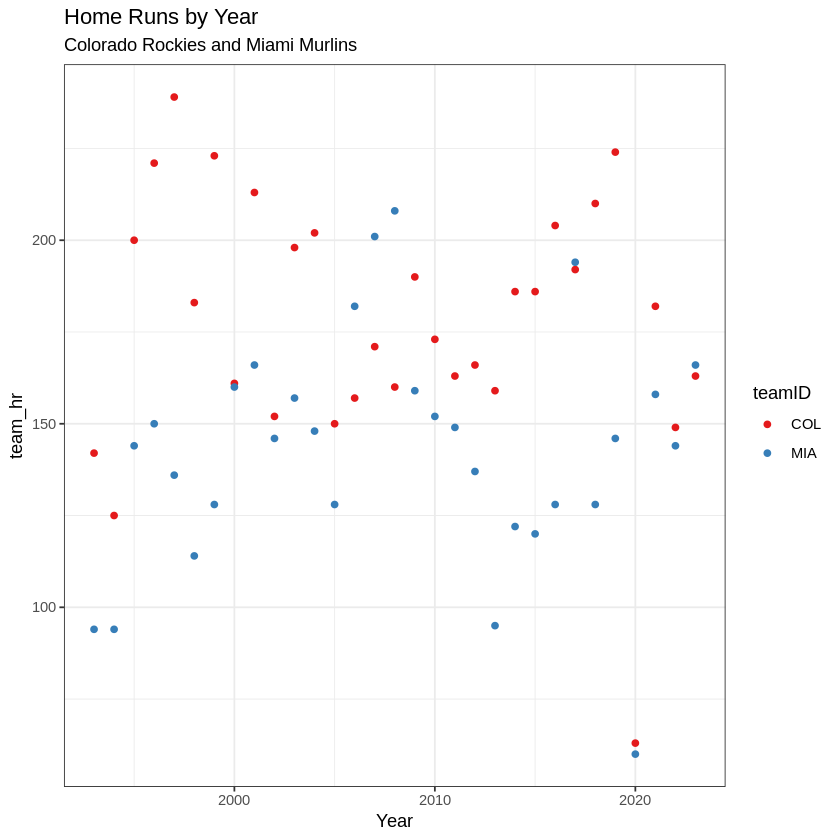

In [ ]:
p <- ggplot(data = df, aes(x = yearID, y = team_hr, col = teamID))

p + geom_point() +
  scale_color_brewer(palette = "Set1") +
  labs(x = "Year",
       title = "Home Runs by Year",
       subtitle = "Colorado Rockies and Miami Murlins"
  ) +
  theme_bw()

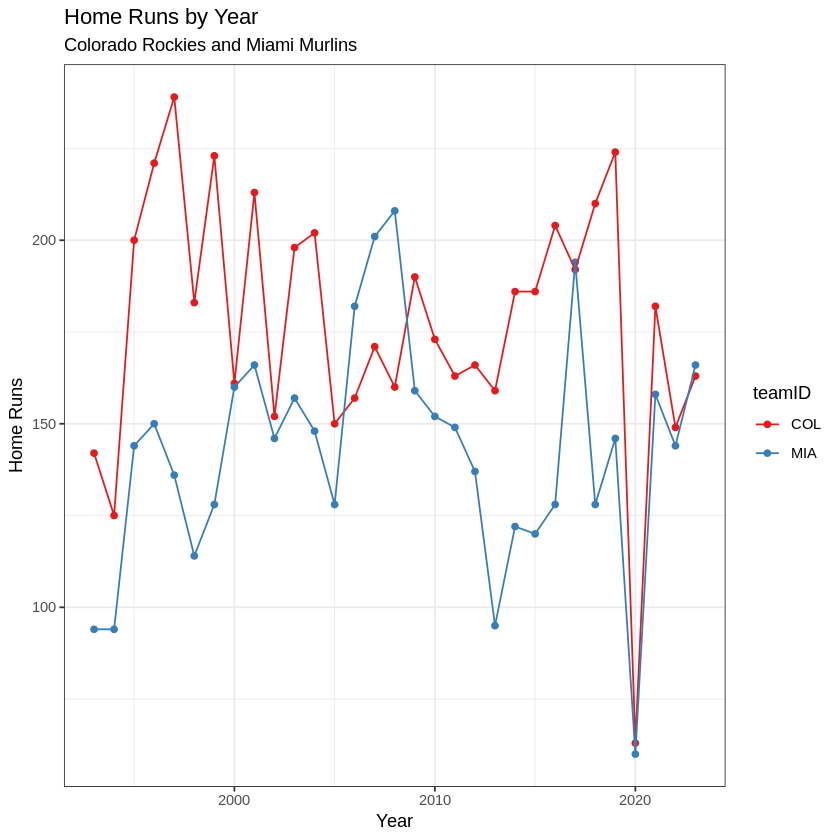

In [ ]:
p <- ggplot(data = df, aes(x = yearID, y = team_hr, col = teamID))

p + geom_point() +
  geom_line()+
  scale_color_brewer(palette = "Set1") +
  labs(x = "Year",
       y = "Home Runs",
       title = "Home Runs by Year",
       subtitle = "Colorado Rockies and Miami Murlins"
  ) +
  theme_bw()

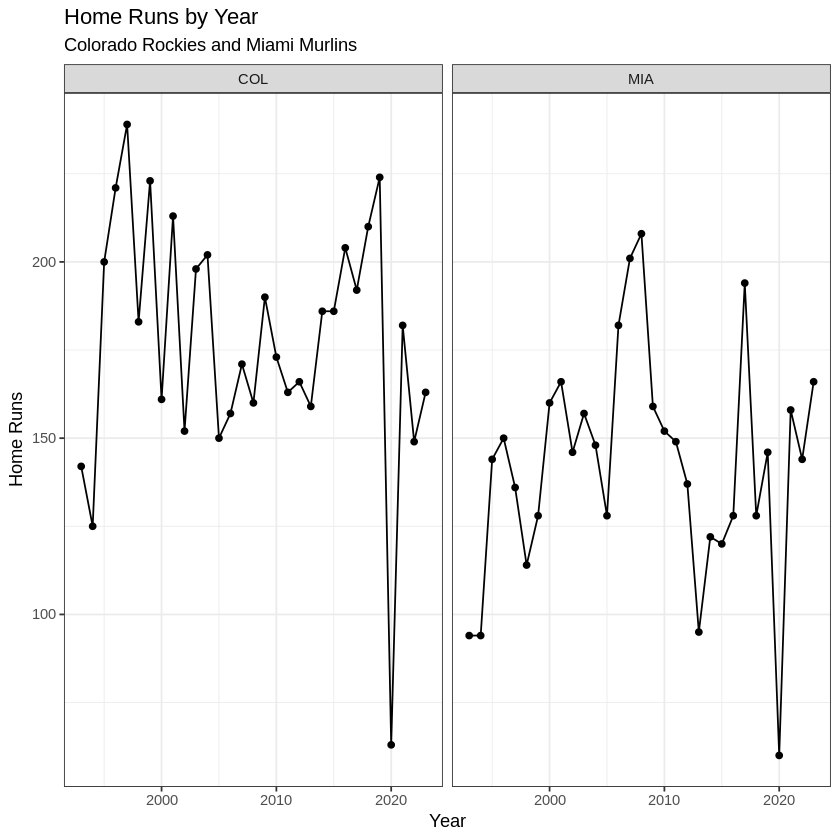

In [ ]:
p <- ggplot(data = df, aes(x = yearID, y = team_hr))

p + geom_point() +
    geom_line()+
    facet_grid(~ teamID) +
    labs(x = "Year",
         y = "Home Runs",
       title = "Home Runs by Year",
       subtitle = "Colorado Rockies and Miami Murlins"
  ) +
  theme_bw()